In [1]:
import os
import tensorflow as tf
import sys
import keras


In [2]:
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    print("Matrix multiplication result:", c.numpy())
    print("Operation executed successfully on GPU")

Matrix multiplication result: [[22. 28.]
 [49. 64.]]
Operation executed successfully on GPU


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import layers
import numpy as np
from sklearn.model_selection import train_test_split

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [3]:
# in case there is problem with your GPU
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

ValueError: Cannot set memory growth on non-GPU and non-Pluggable devices

# Minst number

In [33]:
# Model / data parameters

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# it is better to generate your own stratified valid set instead of validation_split keras option.
# validation_split just take a random split but not stratified
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1)

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_valid = X_valid.astype("float32") / 255

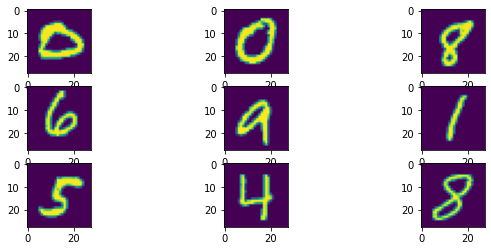

In [34]:
import matplotlib.pyplot as plt
j = 10
fig, axes = plt.subplots(int(j//3), 3, figsize=(10, 4))
axes_ = axes.flatten()
for i in range(9):
    image=X_train[i]
    axes_[i].imshow(image)
plt.show()

In [35]:
# Make sure images have shape (28, 28, 1) <== because you want one channel !!
x_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(X_test, -1)
x_valid = np.expand_dims(X_valid, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_valid.shape[0], "valid samples")
print(x_test.shape[0], "test samples")

x_train shape: (54000, 28, 28, 1)
54000 train samples
6000 valid samples
10000 test samples


In [36]:
num_classes = np.unique(y_train).shape[0]
input_shape = x_train.shape[1:] # 28, 28, 1
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## build model

In [53]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
#         layers.Dense(10, activation='relu'),
#         layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 dropout_8 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout_9 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [54]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [55]:
batch_size = 64
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stop])

Epoch 1/20
844/844 [==============================] - 9s 10ms/step - loss: 0.5325 - accuracy: 0.8085 - val_loss: 0.4201 - val_accuracy: 0.8652
Epoch 2/20
844/844 [==============================] - 9s 10ms/step - loss: 0.3709 - accuracy: 0.8674 - val_loss: 0.3694 - val_accuracy: 0.8787
Epoch 3/20
844/844 [==============================] - 9s 10ms/step - loss: 0.3332 - accuracy: 0.8820 - val_loss: 0.3497 - val_accuracy: 0.8820
Epoch 4/20
844/844 [==============================] - 9s 10ms/step - loss: 0.3065 - accuracy: 0.8906 - val_loss: 0.3153 - val_accuracy: 0.8972
Epoch 5/20
844/844 [==============================] - 9s 10ms/step - loss: 0.2872 - accuracy: 0.8971 - val_loss: 0.2916 - val_accuracy: 0.9008
Epoch 6/20
844/844 [==============================] - 8s 10ms/step - loss: 0.2733 - accuracy: 0.9011 - val_loss: 0.2972 - val_accuracy: 0.8977
Epoch 7/20
844/844 [==============================] - 9s 10ms/step - loss: 0.2618 - accuracy: 0.9044 - val_loss: 0.2774 - val_accuracy: 0.9037

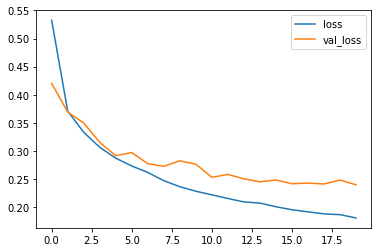

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

**OBSERVATIONS**
- the asymptot is not reached during the training ==> could increase the number of epoch
- no overfitting (thanks to dropout of Conv2D)

In [57]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.251070499420166
Test accuracy: 0.9104999899864197


1/1 [==============================] - 0s 13ms/step


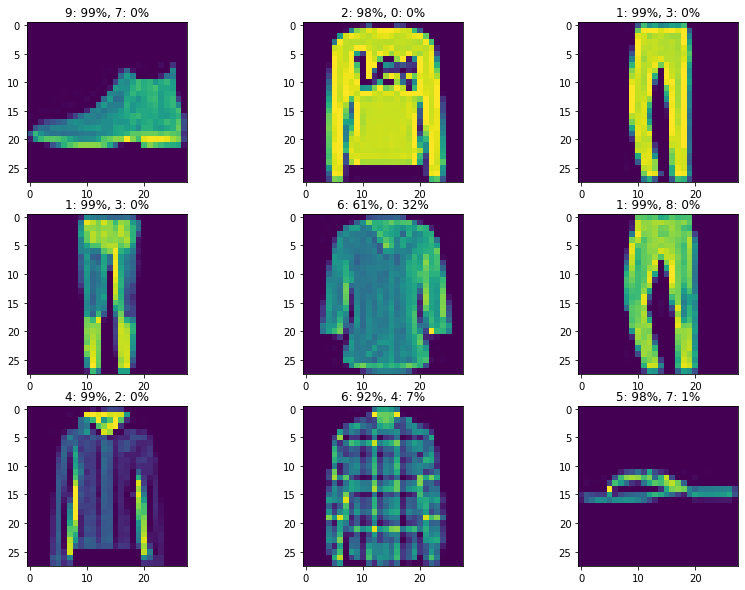

In [58]:
import matplotlib.pyplot as plt

j = 10
fig, axes = plt.subplots(int(j//3), 3, figsize=(14, 10))
axes_ = axes.flatten()
for i in range(9):
    image=X_test[i]
    axes_[i].imshow(image)
    y_pred = model.predict(x_test[[i]])[0]
    idx = np.argsort(y_pred)[-2:][::-1]
    prediction = f'{idx[0]}: {int(y_pred[idx[0]]*100)}%, {idx[1]}: {int(y_pred[idx[1]]*100)}%'
    axes_[i].set_title(prediction)
plt.show()

# MINST FASHION

In [64]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1)

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_valid = X_valid.astype('float32') / 255
X_test = X_test.astype("float32") / 255

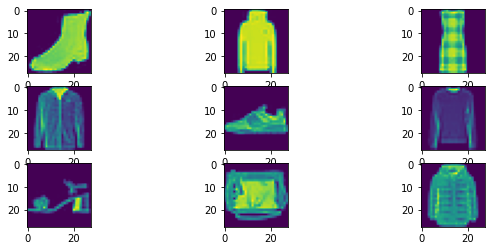

In [65]:
import matplotlib.pyplot as plt
j = 10
fig, axes = plt.subplots(int(j//3), 3, figsize=(10, 4))
axes_ = axes.flatten()
for i in range(9):
    image=X_train[i]
    axes_[i].imshow(image)
plt.show()

In [66]:
# Make sure images have shape (28, 28, 1) <== because you want one channel !!
x_train = np.expand_dims(X_train, -1)
x_valid = np.expand_dims(X_valid, -1)
x_test = np.expand_dims(X_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_valid.shape[0], "valid samples")
print(x_test.shape[0], "test samples")

x_train shape: (54000, 28, 28, 1)
54000 train samples
6000 valid samples
10000 test samples


In [67]:
num_classes = np.unique(y_train).shape[0]
input_shape = x_train.shape[1:] # 28, 28, 1
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [68]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
#         layers.Dense(32, activation='relu'),
#         layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 dropout_10 (Dropout)        (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout_11 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [69]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [70]:
batch_size = 64
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stop]
)

Epoch 1/15
844/844 [==============================] - 11s 12ms/step - loss: 0.5301 - accuracy: 0.8118 - val_loss: 0.4081 - val_accuracy: 0.8663
Epoch 2/15
844/844 [==============================] - 9s 11ms/step - loss: 0.3647 - accuracy: 0.8699 - val_loss: 0.3716 - val_accuracy: 0.8823
Epoch 3/15
844/844 [==============================] - 9s 10ms/step - loss: 0.3297 - accuracy: 0.8812 - val_loss: 0.3209 - val_accuracy: 0.8925
Epoch 4/15
844/844 [==============================] - 9s 10ms/step - loss: 0.3053 - accuracy: 0.8891 - val_loss: 0.3117 - val_accuracy: 0.8983
Epoch 5/15
844/844 [==============================] - 9s 10ms/step - loss: 0.2852 - accuracy: 0.8963 - val_loss: 0.2838 - val_accuracy: 0.9058
Epoch 6/15
844/844 [==============================] - 9s 10ms/step - loss: 0.2688 - accuracy: 0.9026 - val_loss: 0.2787 - val_accuracy: 0.9078
Epoch 7/15
844/844 [==============================] - 9s 10ms/step - loss: 0.2562 - accuracy: 0.9060 - val_loss: 0.2740 - val_accuracy: 0.907

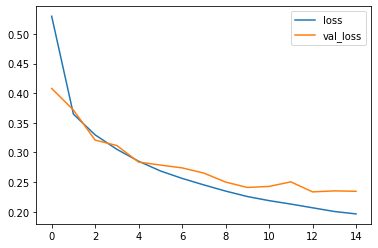

In [71]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

**OBSERVATIONS**
- the asymptot is not reached during the training ==> could increase the number of epoch

In [72]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.26034247875213623
Test accuracy: 0.9075000286102295


In [73]:
dict_label={
    0:'T-shirt/Top', 1:'Trouser',
    2:'Pullover', 3:'Dress', 4:'Coat',
    5:'Sandal', 6:'Shirt', 7:'Sneaker',
    8:'Bag', 9:'Ankle boot'
}

1/1 [==============================] - 0s 14ms/step


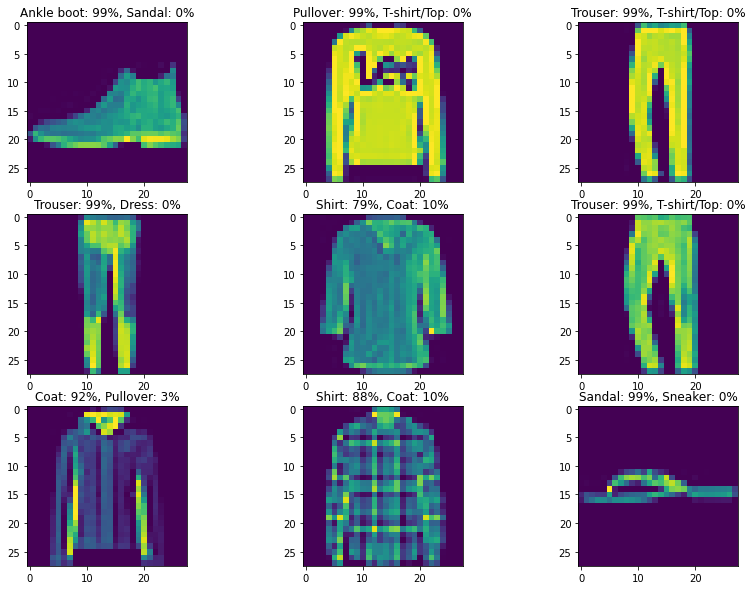

In [74]:
import matplotlib.pyplot as plt

j = 10
fig, axes = plt.subplots(int(j//3), 3, figsize=(14, 10))
axes_ = axes.flatten()
for i in range(9):
    image=X_test[i]
    axes_[i].imshow(image)
    y_pred = model.predict(x_test[[i]])[0]
    idx = np.argsort(y_pred)[-2:][::-1]
    prediction = f'{dict_label[idx[0]]}: {int(y_pred[idx[0]]*100)}%, {dict_label[idx[1]]}: {int(y_pred[idx[1]]*100)}%'
    axes_[i].set_title(prediction)
plt.show()